In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('car.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data = data.drop(['Car_Name'], axis=1)

In [4]:
data['current_year'] = 2020
data['no_year'] = data['current_year'] - data['Year']

In [5]:
data = data.drop(['Year','current_year'],axis = 1)

In [6]:
data = pd.get_dummies(data,drop_first=True)

In [7]:
data = data[['Selling_Price','Present_Price','Kms_Driven','no_year','Owner','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]

In [8]:
data

,Selling_Price,Present_Price,Kms_Driven,no_year,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,6,0,0,1,0,1
1,4.75,9.54,43000,7,0,1,0,0,1
2,7.25,9.85,6900,3,0,0,1,0,1
3,2.85,4.15,5200,9,0,0,1,0,1
4,4.60,6.87,42450,6,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,4,0,1,0,0,1
297,4.00,5.90,60000,5,0,0,1,0,1
298,3.35,11.00,87934,11,0,0,1,0,1
299,11.50,12.50,9000,3,0,1,0,0,1


In [9]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,no_year,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.236141,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.047584,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.524342,0.089216,0.172515,-0.172874,-0.101419,-0.162510
no_year,-0.236141,0.047584,0.524342,1.000000,0.182104,-0.064315,0.059959,0.039896,-0.000394
Owner,-0.088344,0.008057,0.089216,0.182104,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.064315,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.059959,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.039896,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.000394,-0.050316,-0.098643,0.091013,0.063240,1.000000


In [10]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [12]:
model.feature_importances_

array([0.37062445, 0.04339999, 0.07674293, 0.00038079, 0.2242852 ,
       0.01295307, 0.13329166, 0.13832191])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [14]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200,num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf}
print(grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

hyp = RandomizedSearchCV(estimator = model,param_distributions=grid,
    n_iter=10,
    scoring= 'neg_mean_squared_error',
    cv=5,verbose = 2, random_state = 42,n_jobs = 1)

In [18]:
hyp.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [19]:
y_pred = hyp.predict(x_test)

In [20]:
y_pred

array([ 7.03874046,  0.51073204,  4.96488303,  8.41208324, 12.30751218,
        5.28038475,  3.37679915,  0.42523496,  3.87553795,  5.03722399,
        2.83964135,  0.65474599,  5.1272911 ,  7.26292868,  7.41612871,
       12.5062722 ,  6.98776173,  4.155544  ,  0.48151237,  1.31024428,
        3.30145317,  5.22543974,  5.37332365, 10.40042559,  0.24224528,
        0.68405501,  0.32811418,  0.68663144,  0.50912461,  4.85949525,
        2.89178171,  5.85349224,  0.51696665,  7.11736055,  3.30689676,
        1.15153228,  5.72858566,  5.48143575,  0.2597199 ,  7.78040522,
        7.58476841, 22.10353262,  5.08053658,  4.53453109,  5.54359759,
       10.35822114,  0.25571706,  0.75975134,  5.37409395,  6.77858108,
        6.697197  ,  2.96410063,  5.30517556, 22.10353262,  1.15153228,
        1.15153228,  0.41078679,  2.76900422,  3.63189366,  2.53977608,
        4.61684084])

In [21]:
import seaborn as sns

C:\Users\Dhaneshkumar K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

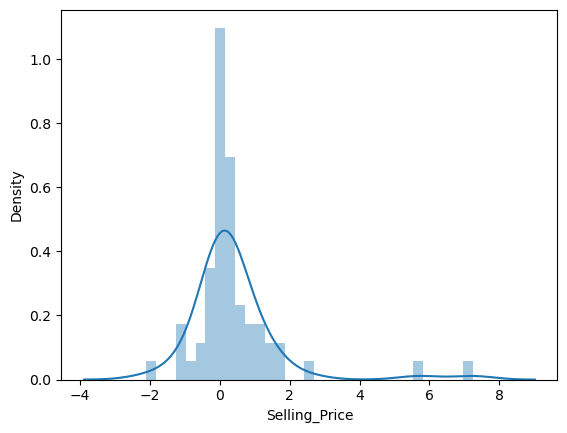

In [22]:
sns.distplot(y_test-y_pred)

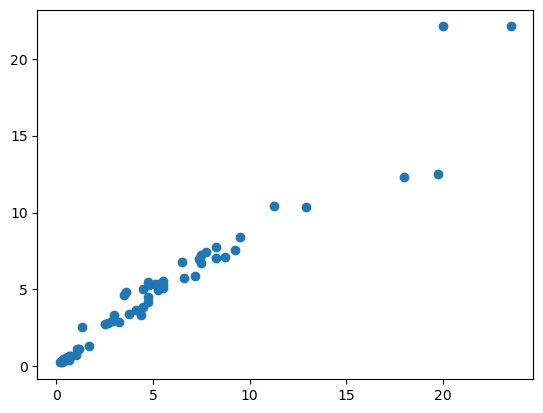

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [24]:
import pickle
file = open('file.pkl','wb')

pickle.dump(hyp,file)

In [25]:
from sklearn.pipeline import make_pipeline

In [26]:
from sklearn.linear_model import Ridge , Lasso, ElasticNet

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [28]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state = 1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state = 1234)),
    'ridge':make_pipeline(Ridge(random_state = 1234)),
    'lasso':make_pipeline(Lasso(random_state = 1234)),
    'enet':make_pipeline(ElasticNet(random_state = 1234)),
}

In [29]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
hypergrid = {
    'rf':{
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [32]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(x_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [33]:
fit_models['ridge'].predict(x_test)

array([ 7.48069375, -0.37957182,  4.24731495,  8.97488362, 14.34546985,
        4.86359497,  3.49412365,  1.46398589,  5.26315849,  4.60759102,
        2.2424799 ,  1.63862694,  5.04743406,  7.48935346,  8.57343935,
       13.95496293,  7.25747282,  4.22422486, -0.4268432 ,  2.39302097,
        4.90630423,  3.87849658,  6.35811565,  8.03589005, -1.8941047 ,
        1.95096003, -0.80857557,  0.83563823,  0.03540676,  7.03076876,
        3.56690957,  7.38878593,  0.73655776,  7.8938761 ,  3.50586505,
        1.82565653,  5.54384597,  6.9432852 , -2.57277968,  9.05861198,
        9.17886674, 19.97852766,  4.36792412,  3.91230819,  6.61710404,
        9.82152449,  0.14431351,  1.70017451,  5.10018638,  7.30868806,
        8.00411002,  4.16150185,  4.849776  , 20.32910316,  1.77009004,
        1.32299203,  0.31679273,  1.96349493,  3.36542284,  0.96119269,
        3.51547002])

# Evaluation

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error

In [35]:
for algo,model in fit_models.items():
    yhat = model.predict(x_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.9610312334881869 MAE:0.5958803278688526
gb scores - R2:0.9628926980642817 MAE:0.610245222436757
ridge scores - R2:0.91469746772391 MAE:0.9881947769715916
lasso scores - R2:0.9043284276461083 MAE:1.0495280759440644
enet scores - R2:0.9096930790942883 MAE:1.0099940183624987


In [36]:
model = fit_models['rf']

In [37]:
model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=1234))]),
             n_jobs=1,
             param_grid={'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 4, 6]})

# Model Deployment in IBM Cloud

In [38]:
!tar -zcvf file.tgz "file.tgz"

a file.tgz


## Install watson-machine-learning-client module

In [39]:
!pip install ibm-watson-machine-learning

## Import the required libraries

In [42]:
from ibm_watson_machine_learning import APIClient

## Get credentials

In [43]:
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "nsMPxkqMjnLbFOa4okSPCk2ZKV0Mr8Mry0NxF6J3KgUb"
}

client = APIClient(wml_credentials)

## Store the model in deployment spaces

In [44]:
# function to store the model in deployment space
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (
        next(item for item in space["resources"] if item["entity"]["name"] == space_name)["metadata"]["id"]
    )

In [45]:
space_uid = guid_from_space_name(client, "space")
print("Space UID - " + space_uid)

Space UID - 2ac5eeb3-b8f9-48f4-8955-9ab1af7fbc65


## Make the deployment space default

In [46]:
client.set.default_space(space_uid)

'SUCCESS'

In [47]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

## Choose software specification

In [50]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [51]:
import sklearn
sklearn.__version__

'1.0.2'

In [58]:
MODEL_NAME = 'car resale value'
DEPLOYMENT_NAME = 'space'
DEMO_MODEL = model

In [59]:
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [60]:
import json

In [61]:
model_details = client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [62]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Selling_Price',
  'schemas': {'input': [{'fields': [{'name': 'Present_Price',
       'type': 'float64'},
      {'name': 'Kms_Driven', 'type': 'int64'},
      {'name': 'no_year', 'type': 'int64'},
      {'name': 'Owner', 'type': 'int64'},
      {'name': 'Fuel_Type_Diesel', 'type': 'uint8'},
      {'name': 'Fuel_Type_Petrol', 'type': 'uint8'},
      {'name': 'Seller_Type_Individual', 'type': 'uint8'},
      {'name': 'Transmission_Manual', 'type': 'uint8'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-18T18:40:16.898Z',
  'id': 'b206f612-f20e-48b7-9fa3-8a63779067c3',
  'modified_at': '2022-11-18T18:40:23.782Z',
  'name': 'car resale value',
  'owner': 'IBMid-666002OS17',
  'resource_key': '52d6bb33-a5e1-4720-98e1-03705edd6d8f',
  'space_id':

In [63]:
model_id = client.repository.get_model_id(model_details)
model_id

'b206f612-f20e-48b7-9fa3-8a63779067c3'

In [64]:
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [65]:
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'b206f612-f20e-48b7-9fa3-8a63779067c3' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9beb194b-f028-4654-98a4-27670244d52d'
------------------------------------------------------------------------------------------------




## Download the model
* Dowload the trained model which is deployed in IBM Cloud.

In [66]:
client.repository.download(model_id, filename="Car resale value")

Successfully saved model content to file: 'Car resale value'


'C:\\Users\\Dhaneshkumar K/Car resale value'